In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-image

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

# Загрузка изображений в структурированный каталог

In [ ]:
def load_image_files(container_path, dimension=(64, 64, 3)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "Image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [ ]:
image_dataset = load_image_files("/content/drive/MyDrive/FinalClothesDataset")

### Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.2,random_state=109)

In [ ]:
X = image_dataset.data
y = image_dataset.target

In [ ]:
X_train.shape

(10648, 12288)

In [ ]:
X_train.shape

(954, 12288)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


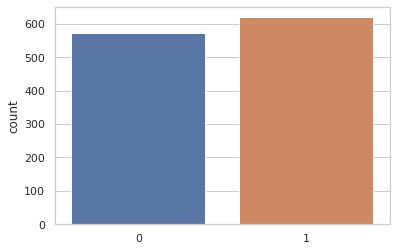

In [ ]:
sns.set(style="whitegrid")
sns.countplot(y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


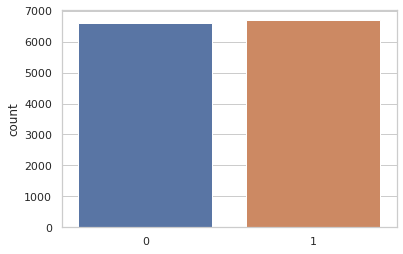

In [ ]:
sns.set(style="whitegrid")
sns.countplot(y)

# **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import metrics

# Без масштабирования

In [ ]:
#базовая модель
knn_basemodel = KNeighborsClassifier()
knn_basemodel.fit(X_train, y_train)
print(knn_basemodel.score(X_test,y_test))

0.7280334728033473


In [ ]:
#поиск оптимального значение K без масштабирования признаков
k_range = range(1, 30)
k_scores_test = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores_test = knn.score(X_test, y_test)
    k_scores_test.append(scores_test)

In [ ]:
max(k_scores_test)

0.7615062761506276

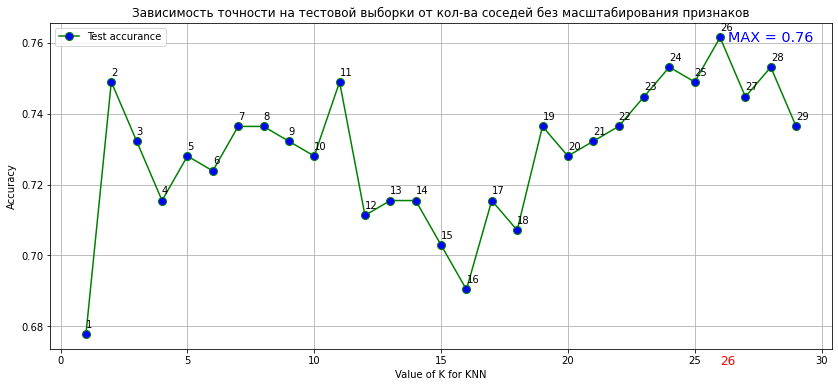

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Зависимость точности на тестовой выборки от кол-ва соседей без масштабирования признаков')
for i in range(1,30):
  if k_scores_test[i-1] == max(k_scores_test):
    plt.text(i+0.3,  k_scores_test[i-1] - 0.001,'MAX = 0.76',fontsize = 'x-large', color = 'blue')
    plt.text(i, 0.6693 , i ,fontsize = 'large', color = 'red') #index = {}'.format(i)
  plt.text(i,k_scores_test[i-1]+0.002, i)

plt.plot(k_range, k_scores_test, color='green',label = 'Test accurance', marker='o',
         markerfacecolor='blue', markersize=8)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Нормализация

In [ ]:
#нормализация признаков
from sklearn import preprocessing
scaler_norm = preprocessing.MinMaxScaler().fit(X_train)
scaler_test_norm = preprocessing.MinMaxScaler().fit(X_test)

X_scaled_train_norm = scaler_norm.transform(X_train)
X_scaled_test_norm = scaler_test_norm.transform(X_test)

scaler_norm = preprocessing.MinMaxScaler().fit(X)
X_scaled_norm = scaler_norm.transform(X)

In [ ]:
#базовая модель
knn_basemodel = KNeighborsClassifier()
knn_basemodel.fit(X_scaled_train_norm, y_train)
print(knn_basemodel.score(X_scaled_test_norm,y_test))

0.7224934284641382


In [ ]:
#поиск оптимального значение K с нормализованными признаками
k_range = range(1, 30)
k_scores_norm = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_scaled_train_norm,y_train)
    scores_test = knn.score(X_scaled_test_norm, y_test)
    k_scores_norm.append(scores_test)

In [ ]:
max(k_scores_norm)

0.7615062761506276

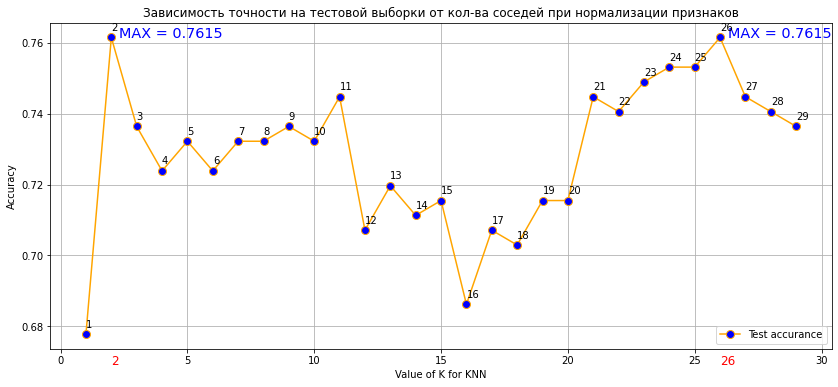

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Зависимость точности на тестовой выборки от кол-ва соседей при нормализации признаков')
for i in range(1,30):
  if k_scores_norm[i-1] == max(k_scores_norm):
    plt.text(i+0.3,  k_scores_norm[i-1] + 0.0001,'MAX = 0.7615',fontsize = 'x-large', color = 'blue')
    plt.text(i, 0.6693 , i ,fontsize = 'large', color = 'red') #index = {}'.format(i)
  plt.text(i,k_scores_norm[i-1]+0.002, i)

plt.plot(k_range, k_scores_norm, color='orange',label = 'Test accurance', marker='o',
         markerfacecolor='blue', markersize=8)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Стандартизация

In [ ]:
#стандартизация признаков
from sklearn import preprocessing
scaler_train_std = preprocessing.StandardScaler().fit(X_train)
scaler_test_std = preprocessing.StandardScaler().fit(X_test)

X_scaled_train_std = scaler_train_std.transform(X_train)
X_scaled_test_std = scaler_test_std.transform(X_test)

scaler_std = preprocessing.StandardScaler().fit(X)
X_scaled_std = scaler_std.transform(X)

In [ ]:
#базовая модель
knn_basemodel = KNeighborsClassifier()
knn_basemodel.fit(X_scaled_train_std, y_train)
print(knn_basemodel.score(X_scaled_test_std, y_test))

0.724371010138941


In [ ]:
#поиск оптимального значение K со стандартизированными признаками
k_range = range(1, 30)
k_scores_test_scaled = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_scaled_train_std,y_train)
    scores_test = knn.score(X_scaled_test_std, y_test)
    k_scores_test_scaled.append(scores_test)

In [ ]:
max(k_scores_test_scaled)

0.7698744769874477

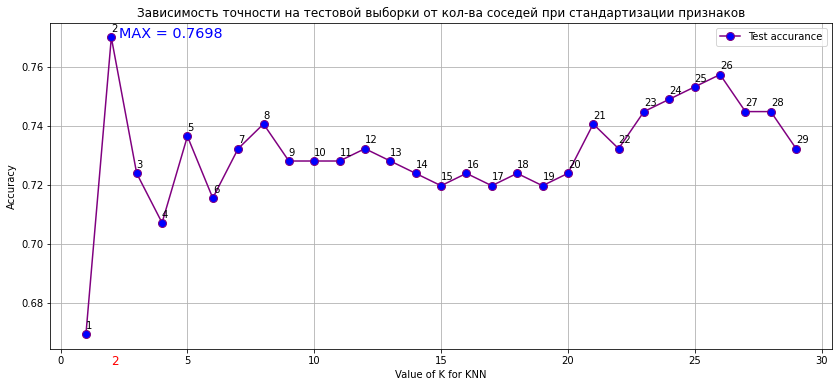

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Зависимость точности на тестовой выборки от кол-ва соседей при стандартизации признаков')
for i in range(1,30):
  if k_scores_test_scaled[i-1] == max(k_scores_test_scaled):
    plt.text(i+0.3,  k_scores_test_scaled[i-1] + 0.0001,'MAX = 0.7698',fontsize = 'x-large', color = 'blue')
    plt.text(i, 0.6593 , i ,fontsize = 'large', color = 'red') #index = {}'.format(i)
    
  plt.text(i,k_scores_test_scaled[i-1]+0.002, i)
plt.plot(k_range, k_scores_test_scaled, color='Purple',label = 'Test accurance', marker='o',
         markerfacecolor='blue', markersize=8)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
k_cross = 0.6
for i in range(29):
  for j in range(5):
    if k_scores_std[i][j] > k_cross:
      k_cross = k_scores_std[i][j]
      
print(k_cross)

0.7824267782426778


In [ ]:
#k-fold cross-validation
k_range = range(1, 30)
k_scores_mean_3 = []
k_scores_std = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)

    scores = cross_val_score(knn, X_scaled_std, y, cv=5, scoring='accuracy')
    k_scores_mean_3.append(scores.mean())
    k_scores_std.append(scores)


In [ ]:
k_scores_std

[array([0.65271967, 0.69874477, 0.71966527, 0.62184874, 0.59243697]),
 array([0.65690377, 0.74058577, 0.76987448, 0.6512605 , 0.58823529]),
 array([0.67364017, 0.69874477, 0.74895397, 0.64285714, 0.60084034]),
 array([0.63179916, 0.71129707, 0.77405858, 0.70588235, 0.59243697]),
 array([0.61087866, 0.66945607, 0.74895397, 0.67226891, 0.59243697]),
 array([0.62343096, 0.72803347, 0.75732218, 0.67226891, 0.58403361]),
 array([0.62343096, 0.70292887, 0.76987448, 0.68067227, 0.59243697]),
 array([0.63179916, 0.73221757, 0.76150628, 0.68487395, 0.58823529]),
 array([0.62343096, 0.70292887, 0.75732218, 0.69747899, 0.58823529]),
 array([0.63179916, 0.72384937, 0.78242678, 0.70588235, 0.57983193]),
 array([0.61506276, 0.69874477, 0.76150628, 0.69747899, 0.57983193]),
 array([0.62343096, 0.70711297, 0.76987448, 0.69327731, 0.57563025]),
 array([0.62761506, 0.69456067, 0.75732218, 0.68067227, 0.59663866]),
 array([0.61506276, 0.70292887, 0.76569038, 0.68067227, 0.60504202]),
 array([0.60251046, 

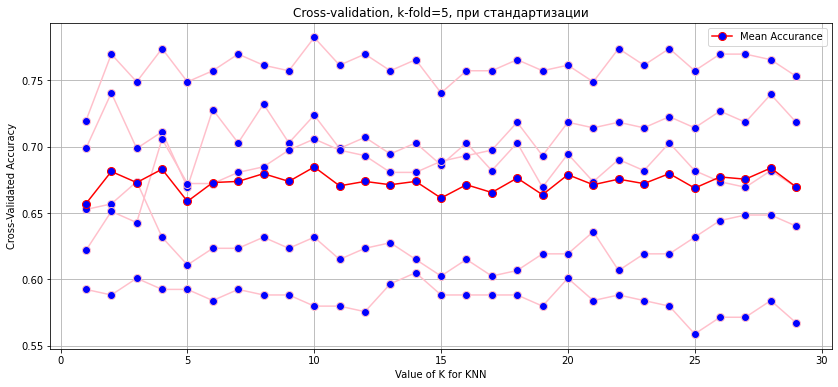

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Cross-validation, k-fold=5, при стандартизации')
#for i in range(1,30):
 # plt.text(i,acc_test[i-1]+0.002, i)
  #if k_scores_mean_3[i-1] == max(k_scores_mean_3):
    #plt.text(i+0.4,  k_scores_test_scaled[i-1] + 0.047,'MAX = 0.7782',fontsize = 'x-large', color = 'blue')
    #print(i)
plt.plot(k_range, k_scores_std, color='pink',marker='o',
         markerfacecolor='blue', markersize=8)
plt.plot(k_range, k_scores_mean_3, color = 'red',marker='o', label = 'Mean Accurance',
         markerfacecolor='blue', markersize=8)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.legend()

In [ ]:
kf = KFold(n_splits = 5, shuffle = True)
rf_reg = KNeighborsClassifier(n_neighbors = 10)
models_list = []
scores_model = []
for i in range(30):
    
    result = next(kf.split(X_scaled_std), None)
    x_tr = X_scaled_std[result[0]]
    x_t = X_scaled_std[result[1]]
    y_tr = y[result[0]]
    y_t = y[result[1]]
    model = rf_reg.fit(x_tr,y_tr)
    models_list.append(model)
    predictions = rf_reg.predict(x_t)
    scores_model.append(model.score(x_t,y_t))

print('Scores from each Iteration: ', scores_model)
print('Average K-Fold Score :' , np.mean(scores_model))

Scores from each Iteration:  [0.7322175732217573, 0.7238493723849372, 0.6778242677824268, 0.6778242677824268, 0.6443514644351465, 0.6861924686192469, 0.7447698744769874, 0.702928870292887, 0.702928870292887, 0.694560669456067, 0.7154811715481172, 0.7489539748953975, 0.7154811715481172, 0.6778242677824268, 0.7364016736401674, 0.698744769874477, 0.7405857740585774, 0.6903765690376569, 0.7322175732217573, 0.698744769874477, 0.7112970711297071, 0.7782426778242678, 0.7280334728033473, 0.702928870292887, 0.698744769874477, 0.7196652719665272, 0.694560669456067, 0.6652719665271967, 0.6820083682008368, 0.6485355648535565]
Average K-Fold Score : 0.7057182705718271


In [ ]:
knn_best = models_list[21]
#pred = knn_best.predict(X_test)
knn_best.score(x_t, y_t)

0.6485355648535565

In [ ]:
k_cross = 0.6
for i in range(29):
  if scores_model[i] > k_cross:
      k_cross = scores_model[i]
      j = i
print(k_cross)
print(j)

0.7782426778242678
21


In [ ]:
 sns.barplot(x=range(1,6), y=k_scores, data=tips)

# Выбор самого оптимальной модели

In [ ]:
#финальное обучение оптимальной модели со стандартизаированными данными
knn_best = KNeighborsClassifier(n_neighbors=2)
knn_best.fit(X_scaled_train_std, y_train)
print(knn_best.score(X_scaled_test_std, y_test))

0.7698744769874477


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=2)
knn_best.fit(X_scaled_train_std, y_train)
print(knn_best.score(X_scaled_test_std, y_test))

0.7698744769874477


In [ ]:
y_pred = knn_best.predict(X_test)
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[110   5]
 [112  12]]


# График ROC-AUC и его значение

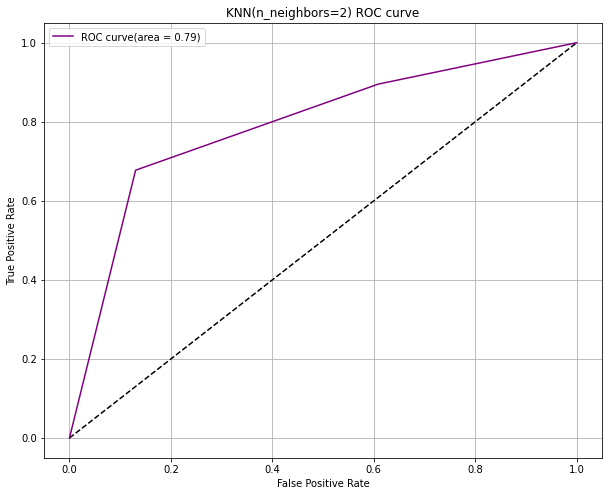

In [ ]:
#график ROC curve
y_pred_proba = knn_best.predict_proba(X_scaled_test_std)[:,1]
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_proba))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, color = 'Purple', label = 'ROC curve(area = 0.79)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN(n_neighbors=2) ROC curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7910238429172509

# Подсчет метрик

In [ ]:
#подсчет метрик
y_predKnn_2 = knn_best.predict(X_scaled_test_std)
print("Classification report for - \n{}:\n{}\n".format(
    knn_best, metrics.classification_report(y_test, y_predKnn_2)))

Classification report for - 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       115
           1       0.85      0.68      0.75       124

    accuracy                           0.77       239
   macro avg       0.78      0.77      0.77       239
weighted avg       0.78      0.77      0.77       239




# Черновик

### **PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_classes = len(np.unique(y))

knn_test = KNeighborsClassifier(n_neighbors=2)

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=0))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=None))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=900,
                                                   random_state=0))

dim_reduction_methods = [('PCA', pca) , ('LDA', lda)]# ('NCA', nca)]

for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn_test.fit(model.transform(X_train), y_train)
  
    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn_test.score(model.transform(X_test), y_test)
   # print(model.transform(X_train).shape)
    print(name, acc_knn)
    # Embed the data set in 2 dimensions using the fitted model
  #  X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
   # plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
  #  plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
   #                                                           2,
  #                                                            acc_knn))
#plt.show()

In [ ]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=954, random_state=0))

k_range = range(1, 21)

k_scores_test_pca = []
error_rate = []
for k in k_range:
    pca.fit(X_train, y_train)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(pca.transform(X_train),y_train)
    scores_test = knn.score(pca.transform(X_test), y_test)
    
    k_scores_test_pca.append(scores_test)

    #pred_i = knn.predict(X_test)
    #error_rate.append(np.mean(pred_i != y_test))

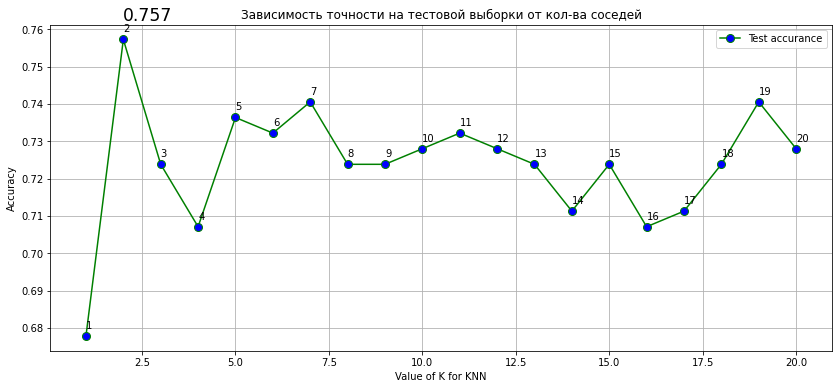

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Зависимость точности на тестовой выборки от кол-ва соседей')

for i in range(1,21):
 # plt.text(i,acc_test[i-1]+0.002, i)
  if k_scores_test_pca[i-1] == max(k_scores_test_pca):
    plt.text(i,  k_scores_test_pca[i-1] + 0.005,round(max(k_scores_test_pca),3),fontsize = 'xx-large', color = 'black')
  plt.text(i,k_scores_test_pca[i-1]+0.002, i)
 #   plt.text(i, 0.2 , i ,fontsize = 'large', color = 'red') #index = {}'.format(i)
  #  plt.text(i, 0.2 , i ,fontsize = 'large', color = 'red') #index = {}'.format(i)

plt.plot(k_range, k_scores_test_pca, color='green',label = 'Test accurance', marker='o',
         markerfacecolor='blue', markersize=8)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
# поиск оптимального значения K для KNN
# список целых чисел от 1 до 30 
# целые числа, которые мы хотим попробовать 


pca = make_pipeline(StandardScaler(),
                    PCA(n_components=None, random_state=0))

#kf = KFold(n_splits = 5, shuffle = True)
k_range = range(1, 21)
# список оценок из k_range 
k_scores_mean = []
k_scores  = []
error_rate_cross = []
#scores_model =[]
# 1. мы переберем разумные значения k для  k  в  k_range 
#for k in range(5):
  #  result = next(kf.split(X), None)
for k in k_range: 
    pca.fit(X, y)
    # 2. запустим KNeighborsClassifier с k соседями 
    knn = KNeighborsClassifier(n_neighbors=k)
   # model = knn.fit(X_train,y_train)
    #predictions = knn.predict(X_test)
       # scores_model.append(model.score(X_test,y_test))
    # 3. получим cross_val_score для KNeighborsClassifier с k соседними 
    scores = cross_val_score(knn, pca.transform(X), y, cv=5, scoring='accuracy')
    # 4. добавить среднее значение оценок для k соседей в список 
    k_scores_mean.append(scores.mean())
    k_scores.append(scores)
   # pred_i = knn.predict(X_test)
   # error_rate_cross.append(np.mean(pred_i != y_test))  
        #print('Scores from each Iteration: ', scores_model)
        #print('Average K-Fold Score :' , np.mean(scores_model))



10


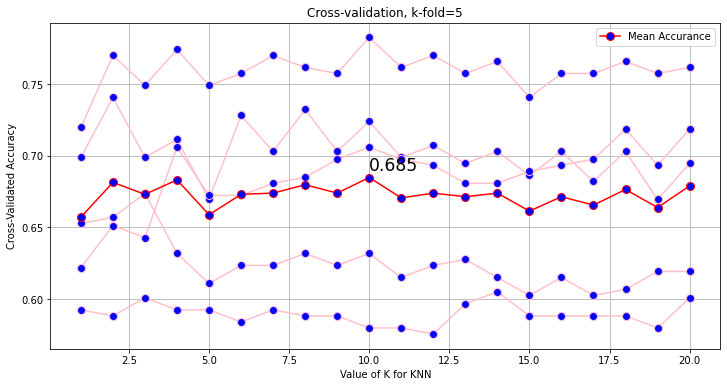

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Cross-validation, k-fold=5')
for i in range(1,21):
 # plt.text(i,acc_test[i-1]+0.002, i)
  if k_scores_mean[i-1] == max(k_scores_mean):
    plt.text(i,  k_scores_mean[i-1] + 0.005,round(max(k_scores_mean),3),fontsize = 'xx-large', color = 'black')
    print(i)
plt.plot(k_range, k_scores, color='pink',marker='o',
         markerfacecolor='blue', markersize=8)
plt.plot(k_range, k_scores_mean, color = 'red',marker='o', label = 'Mean Accurance',
         markerfacecolor='blue', markersize=8)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.legend()

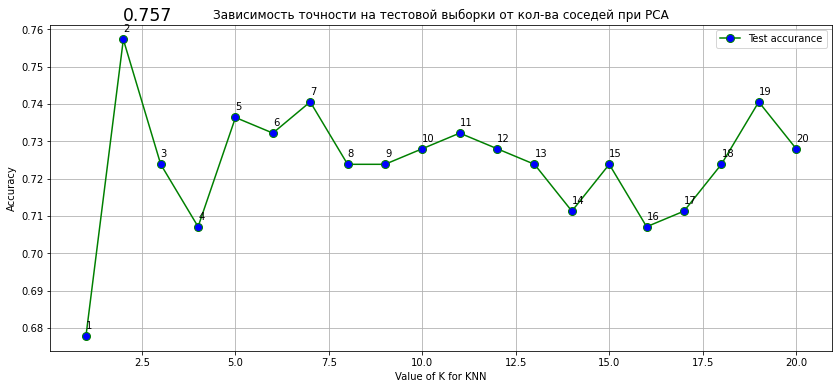

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Зависимость точности на тестовой выборки от кол-ва соседей при PCA')

for i in range(1,21):
 # plt.text(i,acc_test[i-1]+0.002, i)
  if k_scores_test_pca[i-1] == max(k_scores_test_pca):
    plt.text(i,  k_scores_test_pca[i-1] + 0.005,round(max(k_scores_test_pca),3),fontsize = 'xx-large', color = 'black')
  plt.text(i,k_scores_test_pca[i-1]+0.002, i)
 #   plt.text(i, 0.2 , i ,fontsize = 'large', color = 'red') #index = {}'.format(i)
  #  plt.text(i, 0.2 , i ,fontsize = 'large', color = 'red') #index = {}'.format(i)

plt.plot(k_range, k_scores_test_pca, color='green',label = 'Test accurance', marker='o',
         markerfacecolor='blue', markersize=8)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
plt.figure(figsize=(14,6))
for i in range(1,21):
  if error_rate[i-1] == min(error_rate):
    plt.text(i-0.2,  error_rate[i-1] + 0.02,'MIN',fontsize = 'xx-large', color = 'black')
    
plt.plot(k_range, error_rate, color = 'red',label = 'Error rate', marker='o',
         markerfacecolor='blue', markersize=8)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Сравнение моделей полученных с кросс-валидации и модели полученной с валидации

In [ ]:
for i in kf.split(X):
  print(i)

In [ ]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=None, random_state=0))
pca.fit(X, y)
X_tran = pca.transform(X)
#scores = cross_val_score(knn, pca.transform(X)

In [ ]:
kf = KFold(n_splits = 5, shuffle = True)
rf_reg = KNeighborsClassifier(n_neighbors = 2)

scores_model = []
for i in range(5):
    
    result = next(kf.split(X_tran), None)
    x_train = X_tran[result[0]]
    x_test = X_tran[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = rf_reg.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores_model.append(model.score(x_test,y_test))

print('Scores from each Iteration: ', scores_model)
print('Average K-Fold Score :' , np.mean(scores_model))

Scores from each Iteration:  [0.6736401673640168, 0.694560669456067, 0.7447698744769874, 0.7196652719665272, 0.7573221757322176]
Average K-Fold Score : 0.7179916317991631


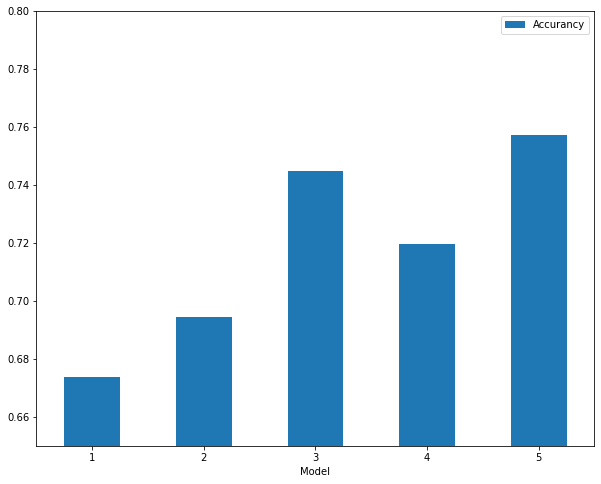

In [ ]:
def plot_accuracy(knn_list_scores):
   # k_range = range(1,6)
    pd.DataFrame({"Model":[i for i in range(1,6)], "Accurancy":knn_list_scores}).set_index("Model").plot.bar(figsize= (10,8),ylim=(0.65,0.80),rot=0)
    #plt.plot(k_range, np.mean(scores_model))
    plt.show()
plot_accuracy(scores_model)


# Простая проверка перебором K

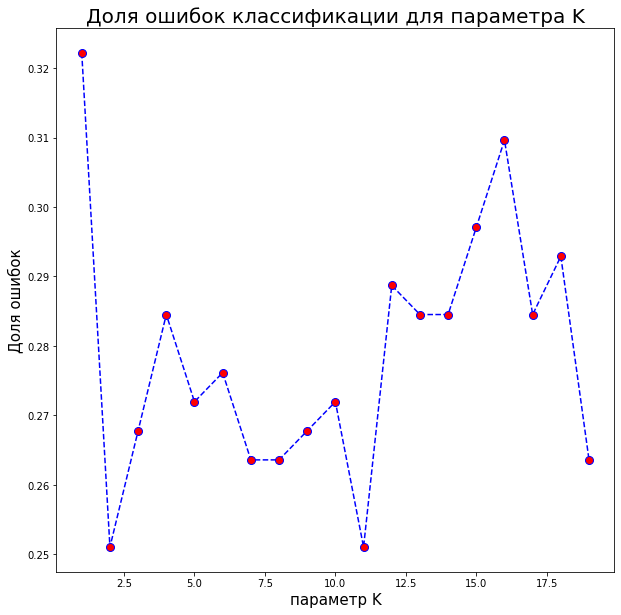

In [ ]:
from sklearn.model_selection import train_test_split

error_rate = []
acc = []
#
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    acc.append(knn.)

plt.figure(figsize=(10,10))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Доля ошибок классификации для параметра K', fontsize=20)
plt.xlabel('параметр K',fontsize=15)
plt.ylabel('Доля ошибок',fontsize=15)
plt.show()

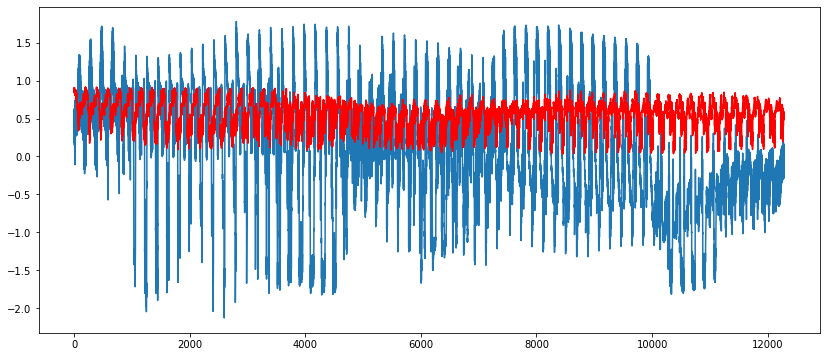

In [ ]:
plt.figure(figsize=(14,6))
k_range = range(2)
plt.plot(X_scaled[0])
plt.plot(X[0], color= 'red')

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_pred_proba #Вероятностные оценки. Возвращенные оценки для всех классов упорядочены по метке классов. 
#Т.е рассчет вероятность каждого класса, предполагая, что он положителен, с помощью логистической функции. и нормализовать эти значения по всем классам.

array([0.54545455, 0.27272727, 0.36363636, 0.27272727, 0.72727273,
       0.90909091, 0.18181818, 0.18181818, 0.45454545, 0.27272727,
       0.        , 0.27272727, 0.63636364, 0.09090909, 0.54545455,
       0.27272727, 0.27272727, 0.45454545, 0.27272727, 0.18181818,
       0.54545455, 0.18181818, 0.09090909, 0.63636364, 0.81818182,
       1.        , 0.81818182, 0.09090909, 1.        , 1.        ,
       0.45454545, 0.81818182, 0.27272727, 0.90909091, 1.        ,
       1.        , 0.81818182, 0.36363636, 0.90909091, 0.90909091,
       0.90909091, 0.27272727, 1.        , 0.45454545, 0.81818182,
       1.        , 0.36363636, 0.18181818, 0.90909091, 1.        ,
       0.90909091, 0.81818182, 1.        , 0.45454545, 0.36363636,
       0.72727273, 0.45454545, 0.72727273, 0.45454545, 0.90909091,
       1.        , 0.63636364, 0.27272727, 0.54545455, 0.81818182,
       0.27272727, 0.27272727, 0.63636364, 0.36363636, 0.        ,
       1.        , 0.18181818, 1.        , 0.81818182, 0.81818

# **Подсчет и визуализация графика ROC_AUC**

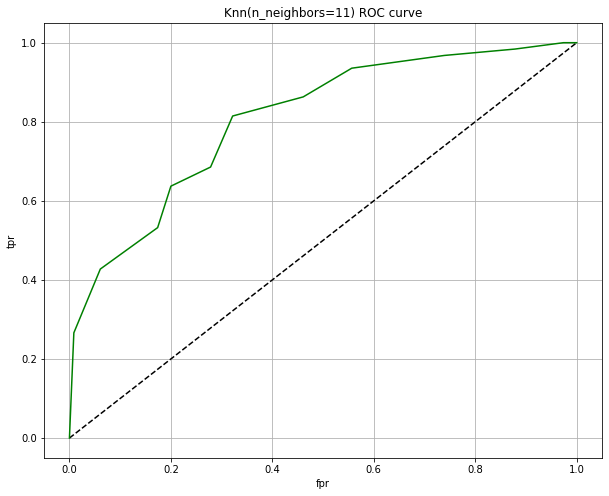

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn', color = 'green')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8212482468443197

# черновик

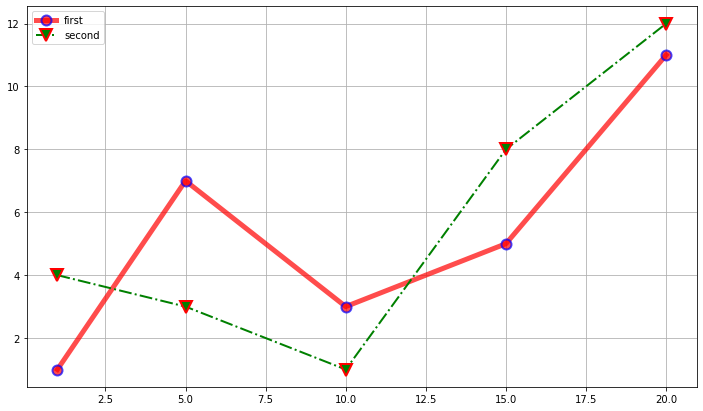

In [ ]:
import matplotlib.pyplot as plt
x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [4, 3, 1, 8, 12]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="second", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

In [ ]:

neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train, y_train)
accTestKnn_1 = neigh1.score(X_test, y_test)
accTrainKnn_1 = neigh1.score(X_train, y_train)
print("[INFO] KNeighborsClassifier TRAIN accuracy: {:.2f}%".format(accTrainKnn_1 * 100))
print("\n")
print("[INFO] KNeighborsClassifier TEST accuracy: {:.2f}%".format(accTestKnn_1 * 100))

[INFO] KNeighborsClassifier TRAIN accuracy: 99.89%


[INFO] KNeighborsClassifier TEST accuracy: 72.89%


In [ ]:
y_predKnn_1 = neigh1.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(
    neigh1, metrics.classification_report(y_test, y_predKnn_1)))

Classification report for - 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.84      0.57      0.68      1331
           1       0.67      0.89      0.77      1332

    accuracy                           0.73      2663
   macro avg       0.75      0.73      0.72      2663
weighted avg       0.75      0.73      0.72      2663




In [ ]:
neigh2 = KNeighborsClassifier(n_neighbors=2)
neigh2.fit(X_train, y_train)
accTestKnn_2 = neigh2.score(X_test, y_test)
accTrainKnn_2 = neigh2.score(X_train, y_train)
print("[INFO] KNeighborsClassifier TRAIN accuracy: {:.2f}%".format(accTrainKnn_2 * 100))
print("\n")
print("[INFO] KNeighborsClassifier TEST accuracy: {:.2f}%".format(accTestKnn_2 * 100))

[INFO] KNeighborsClassifier TRAIN accuracy: 94.99%


[INFO] KNeighborsClassifier TEST accuracy: 74.92%


In [ ]:
y_predKnn_2 = neigh2.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(
    neigh2, metrics.classification_report(y_test, y_predKnn_2)))

Classification report for - 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1331
           1       0.72      0.82      0.77      1332

    accuracy                           0.75      2663
   macro avg       0.75      0.75      0.75      2663
weighted avg       0.75      0.75      0.75      2663




In [ ]:
plot_decision_regions(X_train, y_train, clf=neigh2, legend=2)
# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K=2')
plt.show()

# **RandomForestClassifier**

# перебор параметров сеткой GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

 # Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
#{'n_estimators': [5,10,15,20,25,30]
param_grid = [{'max_features': [5,10,15], 
 'max_depth': [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'bootstrap': [True, False]}
]
forest = RandomForestClassifier(random_state = 0)
grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                  

In [ ]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
grid_search_forest.best_estimator_
print(grid_search_forest.best_estimator_.score(X_train, y_train))
print(grid_search_forest.best_estimator_.score(X_test, y_test))

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# перебор параметров с помощью RandomizedSearchCV



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

0.5881412140968343 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
0.5881412140968343 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.5251252983311396 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.5261474511492736 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.594363141404015 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.49959413351801285 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.5058538898681485 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.5037033901644478 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.5908290339585733 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.5129678010482536 {'n_estimators': 110, 'min_samp

In [ ]:
acc = rf_random.best_estimator_.score(X_test, y_test)
print(acc)

0.7405857740585774


# простой перебор параметра max_depth 

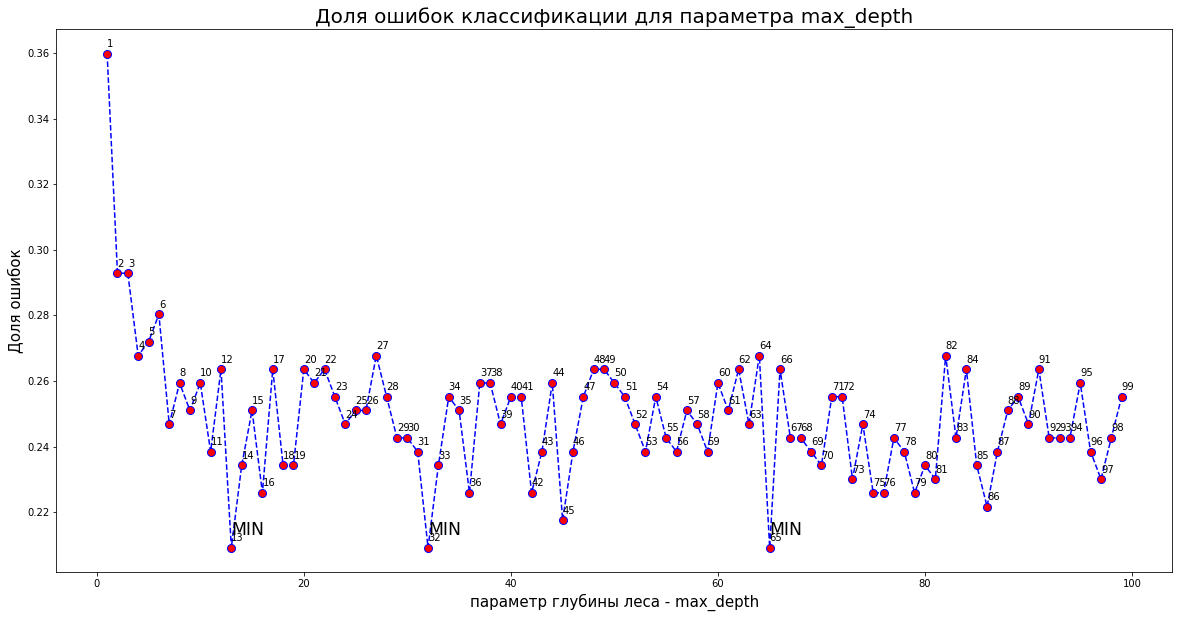

In [ ]:
from sklearn.model_selection import train_test_split

error_rate2 = []
acc_train = []
acc_test = []
#
for i in range(1,100):    
    rand =RandomForestClassifier(max_depth=i)
    rand.fit(X_train,y_train)
    pred_i = rand.predict(X_test)
    error_rate2.append(np.mean(pred_i != y_test))
    acc_train.append(rand.score(X_train, y_train))
    acc_test.append(rand.score(X_test, y_test))

plt.figure(figsize=(20,10))
for i in range(1,100):
  plt.text(i,error_rate2[i-1]+0.002, i)
  if error_rate2[i-1] == min(error_rate2):
    plt.text(i+0.004, error_rate2[i-1]+0.004,'MIN',fontsize = 'xx-large', color = 'black')

plt.plot(range(1,100),error_rate2,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)

plt.title('Доля ошибок классификации для параметра max_depth', fontsize=20)
plt.xlabel('параметр глубины леса - max_depth',fontsize=15)
plt.ylabel('Доля ошибок',fontsize=15)
plt.show()

# **Визуализатор**

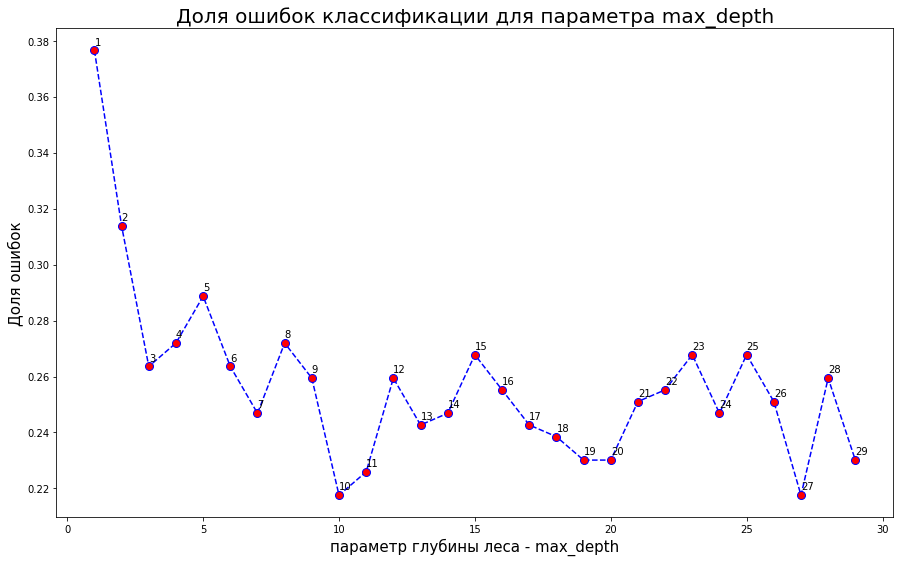

In [ ]:
plt.figure(figsize=(15,9))

for i in range(1,30):
  plt.text(i,error_rate2[i-1]+0.002, i)

plt.plot(range(1,30,1),error_rate2,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Доля ошибок классификации для параметра max_depth', fontsize=20)
plt.xlabel('параметр глубины леса - max_depth',fontsize=15)
plt.ylabel('Доля ошибок',fontsize=15)
plt.show()

In [ ]:
randomForest13 = RandomForestClassifier(max_depth=13, random_state=0)
randomForest13.fit(X_train, y_train)
accTestRF_13 = randomForest13.score(X_test, y_test)
accTrainRF_13 = randomForest13.score(X_train, y_train)
print("[INFO] RandomForestClassifier TRAIN accuracy: {:.2f}%".format(accTrainRF_13 * 100))
print("\n")
print("[INFO] RandomForestClassifier TEST accuracy: {:.2f}%".format(accTestRF_13 * 100))

[INFO] RandomForestClassifier TRAIN accuracy: 100.00%


[INFO] RandomForestClassifier TEST accuracy: 77.41%


In [ ]:

randomForest13 = RandomForestClassifier(max_depth=13, random_state=0)
randomForest13.fit(X_train, y_train)
accTestRF_13 = randomForest13.score(X_test, y_test)
accTrainRF_13 = randomForest13.score(X_train, y_train)
print("[INFO] RandomForestClassifier TRAIN accuracy: {:.2f}%".format(accTrainRF_13 * 100))
print("\n")
print("[INFO] RandomForestClassifier TEST accuracy: {:.2f}%".format(accTestRF_13 * 100))

[INFO] RandomForestClassifier TRAIN accuracy: 99.45%


[INFO] RandomForestClassifier TEST accuracy: 83.51%


In [ ]:
randomForest14 = RandomForestClassifier(max_depth=14, random_state=0)
randomForest14.fit(X_train, y_train)
accTestRF_14 = randomForest14.score(X_test, y_test)
accTrainRF_14 = randomForest14.score(X_train, y_train)
print("[INFO] RandomForestClassifier TRAIN accuracy: {:.2f}%".format(accTrainRF_14 * 100))
print("\n")
print("[INFO] RandomForestClassifier TEST accuracy: {:.2f}%".format(accTestRF_14 * 100))

[INFO] RandomForestClassifier TRAIN accuracy: 99.73%


[INFO] RandomForestClassifier TEST accuracy: 82.95%


In [ ]:
randomForest10 = RandomForestClassifier(max_depth=10, random_state=0)
randomForest10.fit(X_train, y_train)
accTestRF_10 = randomForest10.score(X_test, y_test)
accTrainRF_10 = randomForest10.score(X_train, y_train)
print("[INFO] RandomForestClassifier TRAIN accuracy: {:.2f}%".format(accTrainRF_10 * 100))
print("\n")
print("[INFO] RandomForestClassifier TEST accuracy: {:.2f}%".format(accTestRF_10 * 100))

[INFO] RandomForestClassifier TRAIN accuracy: 97.51%


[INFO] RandomForestClassifier TEST accuracy: 82.16%


In [ ]:
randomForest11 = RandomForestClassifier(max_depth=11, random_state=0)
randomForest11.fit(X_train, y_train)
accTestRF_11 = randomForest11.score(X_test, y_test)
accTrainRF_11 = randomForest11.score(X_train, y_train)
print("[INFO] RandomForestClassifier TRAIN accuracy: {:.2f}%".format(accTrainRF_11 * 100))
print("\n")
print("[INFO] RandomForestClassifier TEST accuracy: {:.2f}%".format(accTestRF_11 * 100))

[INFO] RandomForestClassifier TRAIN accuracy: 98.50%


[INFO] RandomForestClassifier TEST accuracy: 83.03%


In [ ]:
randomForest12 = RandomForestClassifier(max_depth=12, random_state=0)
randomForest12.fit(X_train, y_train)
accTestRF_12 = randomForest12.score(X_test, y_test)
accTrainRF_12 = randomForest12.score(X_train, y_train)
print("[INFO] RandomForestClassifier TRAIN accuracy: {:.2f}%".format(accTrainRF_12 * 100))
print("\n")
print("[INFO] RandomForestClassifier TEST accuracy: {:.2f}%".format(accTestRF_12 * 100))

[INFO] RandomForestClassifier TRAIN accuracy: 99.21%


[INFO] RandomForestClassifier TEST accuracy: 83.44%


In [ ]:
y_predRF13 = randomForest13.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(
    randomForest13, metrics.classification_report(y_test, y_predRF)))

Classification report for - 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1331
           1       0.82      0.86      0.84      1332

    accuracy                           0.84      2663
   macro avg       0.84      0.84      0.84      2663
weighted avg       0.84      0.84      0.84      2663




# **SupportVectorsMachineClassifier**

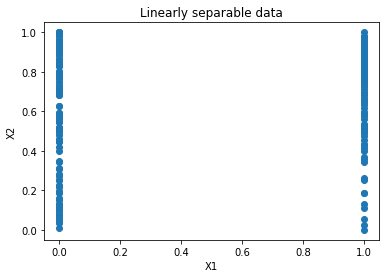

(954, 12288)

In [ ]:
from sklearn.model_selection import train_test_split

error_rate2 = []
acc_train = []
acc_test = []
#
for i in range(1,):    
    rand =RandomForestClassifier(max_depth=i)
    rand.fit(X_train,y_train)
    pred_i = rand.predict(X_test)
    error_rate2.append(np.mean(pred_i != y_test))
    acc_train.append(rand.score(X_train, y_train))
    acc_test.append(rand.score(X_test, y_test))

plt.figure(figsize=(20,10))
for i in range(1,100):
  plt.text(i,error_rate2[i-1]+0.002, i)
  if error_rate2[i-1] == min(error_rate2):
    plt.text(i+0.004, error_rate2[i-1]+0.004,'MIN',fontsize = 'xx-large', color = 'black')

plt.plot(range(1,100),error_rate2,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)

plt.title('Доля ошибок классификации для параметра max_depth', fontsize=20)
plt.xlabel('параметр глубины леса - max_depth',fontsize=15)
plt.ylabel('Доля ошибок',fontsize=15)
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)

# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
clf = SVC(C=0.1, kernel='linear').fit(X_train, y_train)

In [ ]:
SupportVectorsMachine = SVC()
SupportVectorsMachine.fit(X_train, y_train)
accTestSVC = SupportVectorsMachine.score(X_test, y_test)
accTrainSVC = SupportVectorsMachine.score(X_train, y_train)
print("[INFO] SupportVectorsMachine TRAIN accuracy: {:.2f}%".format(accTrainSVC * 100))
print("\n")
print("[INFO] SupportVectorsMachine TEST accuracy: {:.2f}%".format(accTestSVC * 100))

[INFO] SupportVectorsMachine TRAIN accuracy: 90.88%


[INFO] SupportVectorsMachine TEST accuracy: 79.08%


In [ ]:
y_predSVM = SupportVectorsMachine.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(
    SupportVectorsMachine, metrics.classification_report(y_test, y_predSVM)))

Classification report for - 
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1331
           1       0.84      0.88      0.86      1332

    accuracy                           0.86      2663
   macro avg       0.86      0.86      0.86      2663
weighted avg       0.86      0.86      0.86      2663




In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)


In [ ]:
y_predSVMGrid = clf.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_predSVMGrid)))